In [48]:
# Import packages
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from tabulate import tabulate

In [49]:
# Data upload
df = pd.read_csv('ProjectData.csv')
df.head()

,Date,UR_sa,HPI_sa
0,1/1/1991,6.4,100.00
1,2/1/1991,6.6,100.45
2,3/1/1991,6.8,100.48
3,4/1/1991,6.7,100.33
4,5/1/1991,6.9,100.39


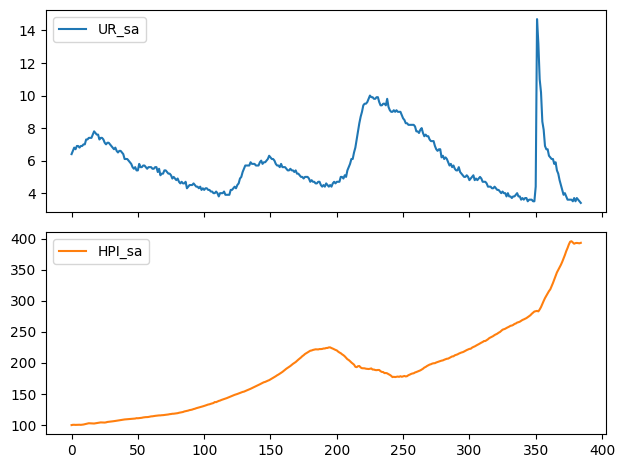

In [50]:
# Time series plots
df.plot(subplots=True, layout=(2,1))
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# ARDL Model
hpi = df['HPI_sa']
ur = df['UR_sa']

exog = df[['UR_sa']]
ardl_model = ARDL(hpi, 2, exog, 4, causal=True)
ardl_results = ardl_model.fit()
print(ardl_results.summary())

                              ARDL Model Results                              
Dep. Variable:                 HPI_sa   No. Observations:                  385
Model:                     ARDL(2, 4)   Log Likelihood                -391.105
Method:               Conditional MLE   S.D. of innovations              0.672
Date:                Mon, 08 May 2023   AIC                            798.210
Time:                        05:21:24   BIC                            829.795
Sample:                             4   HQIC                           810.739
                                  385                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2160      0.178     -1.216      0.225      -0.565       0.133
HPI_sa.L1      1.8350      0.031     59.963      0.000       1.775       1.895
HPI_sa.L2     -0.8338      0.031    -27.005      0.0

In [52]:
# Forecast xt (Unemployment Rate)
ar_model = AutoReg(endog=ur, exog=None, lags=6)
ar_results = ar_model.fit()

print(ar_results.summary())

                            AutoReg Model Results                             
Dep. Variable:                  UR_sa   No. Observations:                  385
Model:                     AutoReg(6)   Log Likelihood                -324.264
Method:               Conditional MLE   S.D. of innovations              0.569
Date:                Mon, 08 May 2023   AIC                            664.529
Time:                        05:21:24   BIC                            696.029
Sample:                             6   HQIC                           677.029
                                  385                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2558      0.108      2.376      0.017       0.045       0.467
UR_sa.L1       1.0028      0.051     19.520      0.000       0.902       1.103
UR_sa.L2      -0.1428      0.073     -1.968      0.0

In [73]:
forecast_UR = ar_results.forecast(12)
UR_complete = ur.append(forecast_UR)

residual_variance = np.var(ar_results.resid)
prediction_interval_variance = np.arange(1, len(forecast_UR)+1) * residual_variance
forecast_UR_lower = forecast_UR - 1.96*np.sqrt(prediction_interval_variance)
forecast_UR_upper = forecast_UR + 1.96*np.sqrt(prediction_interval_variance)

x_intervals = pd.concat([forecast_UR, forecast_UR_lower, forecast_UR_upper], axis=1)
x_intervals = x_intervals.rename({0:'Forecast Value', 1:'Lower Bound', 2:'Upper Bound'}, axis=1)
x_intervals.index.names = ['Date']
print(x_intervals.to_markdown())

|   Date |   Forecast Value |   Lower Bound |   Upper Bound |
|-------:|-----------------:|--------------:|--------------:|
|    385 |          393.87  |       392.537 |       395.202 |
|    386 |          394.541 |       392.657 |       396.425 |
|    387 |          395.211 |       392.903 |       397.519 |
|    388 |          395.865 |       393.201 |       398.53  |
|    389 |          396.605 |       393.625 |       399.584 |
|    390 |          397.393 |       394.129 |       400.657 |
|    391 |          398.218 |       394.692 |       401.743 |
|    392 |          399.076 |       395.307 |       402.844 |
|    393 |          399.962 |       395.965 |       403.959 |
|    394 |          400.879 |       396.666 |       405.093 |
|    395 |          401.826 |       397.407 |       406.245 |
|    396 |          402.8   |       398.184 |       407.416 |


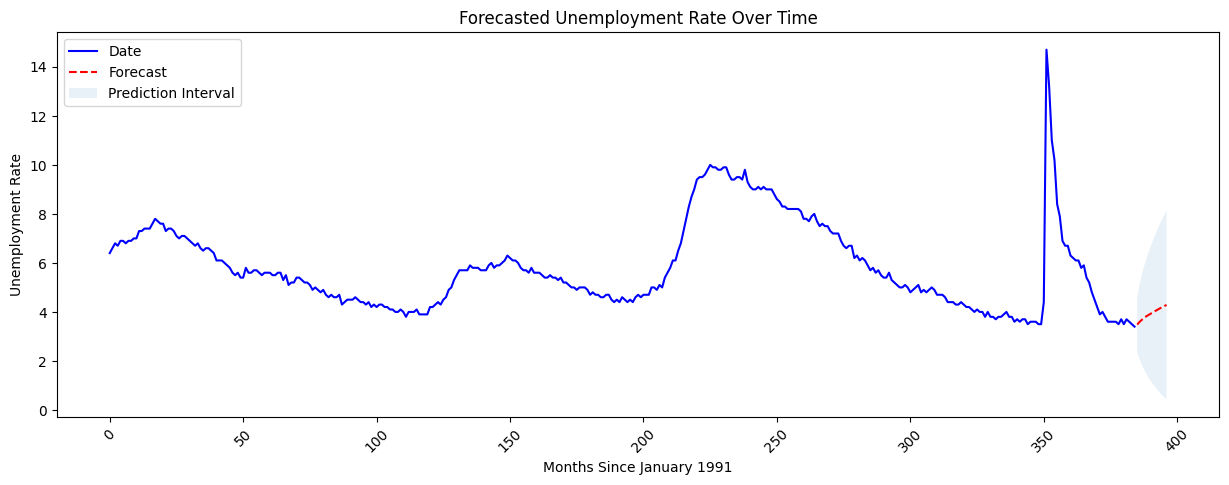

In [55]:
plt.figure(figsize=(15,5))
plt.plot(ur.index, ur.values, color='blue', label='Date')
plt.plot(forecast_UR.index, forecast_UR, linestyle='dashed', color='red', label='Forecast')
plt.fill_between(forecast_UR.index, forecast_UR_lower, forecast_UR_upper, 
    label='Prediction Interval', alpha=.1)

plt.legend()
plt.title('Forecasted Unemployment Rate Over Time')
plt.ylabel('Unemployment Rate')
plt.xlabel('Months Since January 1991')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Forecast yt (HPI)
ar_model = AutoReg(endog=hpi, exog=None, lags=6)
ar_results = ar_model.fit()
print(ar_results.summary())

forecast_HPI = ar_results.forecast(12)
HPI_complete = hpi.append(forecast_HPI)

residual_variance = np.var(ar_results.resid)
prediction_interval_variance = np.arange(1, len(forecast_HPI)+1) * residual_variance
forecast_HPI_lower = forecast_HPI - 1.96*np.sqrt(prediction_interval_variance)
forecast_HPI_upper = forecast_HPI + 1.96*np.sqrt(prediction_interval_variance)

                            AutoReg Model Results                             
Dep. Variable:                 HPI_sa   No. Observations:                  385
Model:                     AutoReg(6)   Log Likelihood                -391.504
Method:               Conditional MLE   S.D. of innovations              0.680
Date:                Mon, 08 May 2023   AIC                            799.009
Time:                        05:36:09   BIC                            830.509
Sample:                             6   HQIC                           811.510
                                  385                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0245      0.112      0.219      0.827      -0.195       0.244
HPI_sa.L1      1.6695      0.051     32.552      0.000       1.569       1.770
HPI_sa.L2     -0.5849      0.100     -5.843      0.0

In [71]:
y_intervals = pd.concat([forecast_HPI, forecast_HPI_lower, forecast_HPI_upper], axis=1)
y_intervals = y_intervals.rename({0:'Forecast Value', 1:'Lower Bound', 2:'Upper Bound'}, axis=1)
y_intervals.index.names = ['Date']
print(y_intervals.to_markdown())

|   Date |   Forecast Value |   Lower Bound |   Upper Bound |
|-------:|-----------------:|--------------:|--------------:|
|    385 |          393.87  |       392.537 |       395.202 |
|    386 |          394.541 |       392.657 |       396.425 |
|    387 |          395.211 |       392.903 |       397.519 |
|    388 |          395.865 |       393.201 |       398.53  |
|    389 |          396.605 |       393.625 |       399.584 |
|    390 |          397.393 |       394.129 |       400.657 |
|    391 |          398.218 |       394.692 |       401.743 |
|    392 |          399.076 |       395.307 |       402.844 |
|    393 |          399.962 |       395.965 |       403.959 |
|    394 |          400.879 |       396.666 |       405.093 |
|    395 |          401.826 |       397.407 |       406.245 |
|    396 |          402.8   |       398.184 |       407.416 |


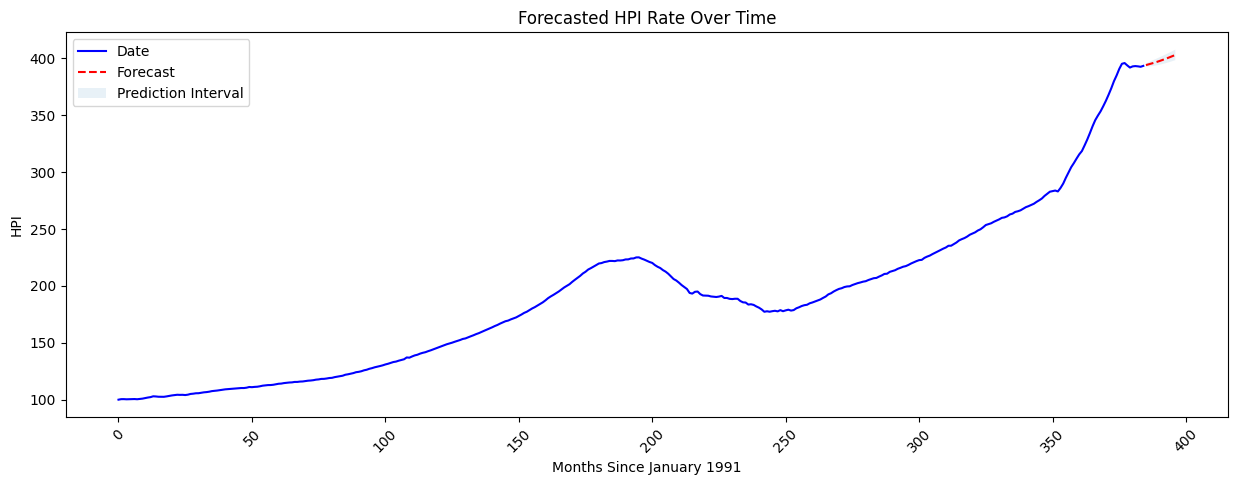

In [72]:
plt.figure(figsize=(15,5))
plt.plot(hpi.index, hpi.values, color='blue', label='Date')
plt.plot(forecast_HPI.index, forecast_HPI, linestyle='dashed', color='red', label='Forecast')
plt.fill_between(forecast_HPI.index, forecast_HPI_lower, forecast_HPI_upper, 
    label='Prediction Interval', alpha=.1)

plt.legend()
plt.title('Forecasted HPI Rate Over Time')
plt.ylabel('HPI')
plt.xlabel('Months Since January 1991')
plt.xticks(rotation=45)
plt.show()